In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display

In [ ]:
#Getting PUCPR logo from URL
!wget https://logodix.com/logo/627975.png -O pucpr.png

--2021-08-02 22:47:51--  https://logodix.com/logo/627975.png
Resolving logodix.com (logodix.com)... 142.54.177.50
Connecting to logodix.com (logodix.com)|142.54.177.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8856 (8.6K) [image/png]
Saving to: ‘pucpr.png’

pucpr.png           100%[===================>]   8.65K  --.-KB/s    in 0s      

2021-08-02 22:47:51 (88.3 MB/s) - ‘pucpr.png’ saved [8856/8856]



#Manipulating Images With Opencv

(290, 290, 3)


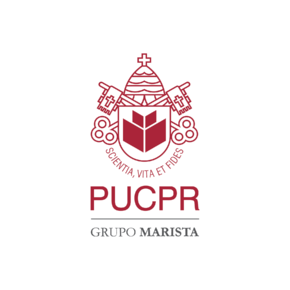

In [ ]:
#Loading a color image from disk
img_color = cv2.imread('pucpr.png',cv2.IMREAD_COLOR)
print(img_color.shape)
cv2_imshow(img_color)                       


(290, 290)


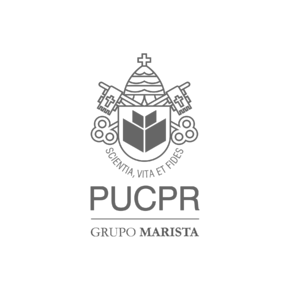

In [ ]:
#Loading a gray image from disk
img_gray = cv2.imread('pucpr.png', cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)
cv2_imshow(img_gray) 

#Drawing Functions
https://docs.opencv.org/4.5.2/dc/da5/tutorial_py_drawing_functions.html

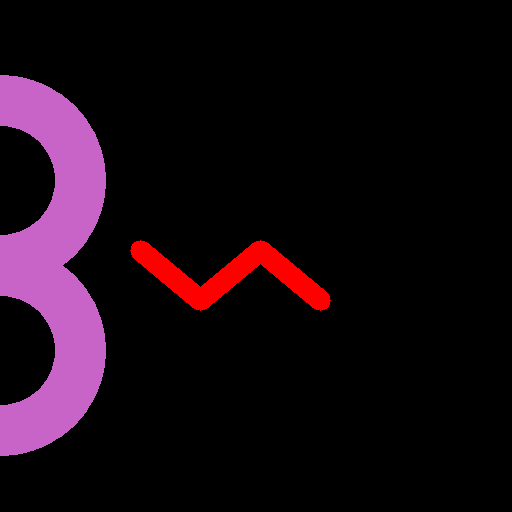

In [ ]:
img = np.zeros((512,512,3), np.uint8)

#cv2.line(img,(0,0),(511,511),(255,0,0),5)
#cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
#cv2.circle(img,(447,63), 63, (0,0,255), -1)

cv2.circle(img,(0,180), 80, (200,100, 200), 50)
cv2.circle(img,(0,350), 80, (200,100, 200), 50)

cv2.line(img,(140,250),(200,300),(0,0,255),20)
cv2.line(img,(200,300),(260,250),(0,0,255),20)
cv2.line(img,(260,250),(320,300),(0,0,255),20)

cv2_imshow(img)

In [ ]:
#Accessing a specific pixel
val = img_color[10,10]
print(val)

val = img_gray[10,10]
print(val)

[255 255 255]
255


#Practice 1

Compute a image histogram for the PUCPR Logo in grayscale. You need to implement by your own. Do not use Opencv Functions.

The histogram compute the frequencies of each pixel value (0-255)

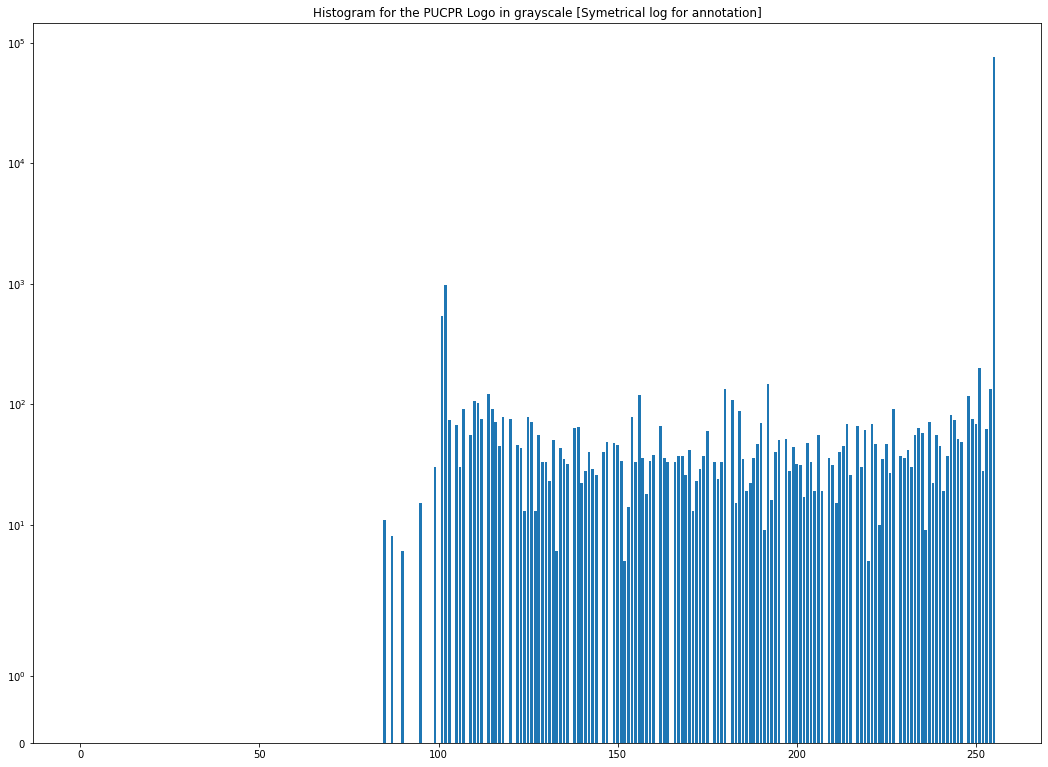

In [ ]:
#Implement Practive 1 here

img_gray = cv2.imread('pucpr.png', cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)

img_pixels = [0 for i in range(256)]

for i in range(len(img_gray)): 
    for j in range(len(img_gray[i])):    
        img_pixels[img_gray[i][j]] += 1

fig, ax = plt.subplots(figsize=(14, 10))

ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(256)), img_pixels, width = 0.75)
plt.yscale('symlog')
plt.title("Histogram for the PUCPR Logo in grayscale [Symetrical log for annotation]")
plt.show()

# Symetrical log represents, visually, a better distribution of the pixels on the logo.


#Practice 2

Extract each channel from the color image and show them. You can use any image.




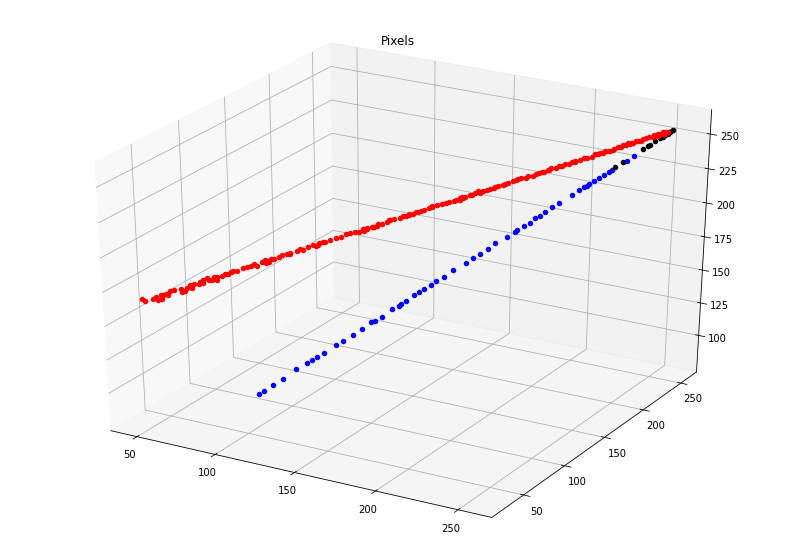

In [ ]:
#Implement Practice 2 here

# logic -> [B, G, R]; if r > g and r > b, then it is a red sample. Same applies for blue and green.

B, G, R, Mono = [], [], [], []

for i in range(len(img_color)):
    for j in range(len(img_color[i])):
        
        if img_color[i][j][2] > img_color[i][j][1] and img_color[i][j][2] > img_color[i][j][0]:

            R.append((img_color[i][j]))

        if img_color[i][j][1] > img_color[i][j][2] and img_color[i][j][1] > img_color[i][j][0]:

            G.append((img_color[i][j]))

        if img_color[i][j][0] > img_color[i][j][1] and img_color[i][j][0] > img_color[i][j][2]:

            B.append((img_color[i][j]))

        if img_color[i][j][0] == img_color[i][j][1] == img_color[i][j][2]:

            Mono.append((img_color[i][j]))

R = np.unique(R, axis = 0).tolist()
G = np.unique(G, axis = 0).tolist()
B = np.unique(B, axis = 0).tolist()
Mono = np.unique(Mono, axis = 0).tolist()


from mpl_toolkits import mplot3d

fig, ax = plt.subplots(figsize=(14, 10))
ax = plt.axes(projection ='3d')
 
for i in range(len(R)):
    ax.scatter(*R[i], c = "red")

for i in range(len(G)):
    ax.scatter(*G[i], c = "green")

for i in range(len(B)):
    ax.scatter(*B[i], c = "blue")

for i in range(len(Mono)):
    ax.scatter(*Mono[i], c = "black")

ax.set_title("Pixels")
plt.show()

--2021-08-02 23:59:08--  https://thumbs.dreamstime.com/z/red-green-blue-balls-15240037.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63341 (62K) [image/jpeg]
Saving to: ‘img_rgb.jpg’

img_rgb.jpg         100%[===================>]  61.86K  --.-KB/s    in 0.01s   

2021-08-02 23:59:09 (5.80 MB/s) - ‘img_rgb.jpg’ saved [63341/63341]



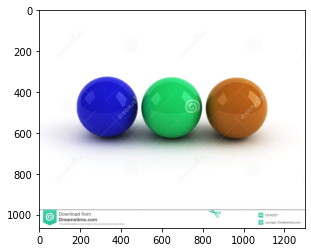

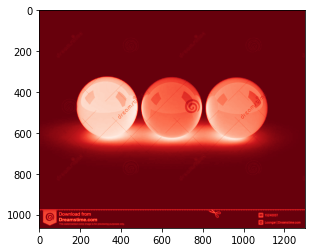

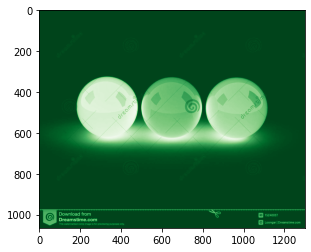

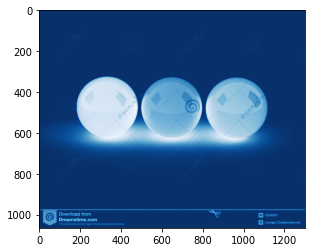

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])


!wget https://thumbs.dreamstime.com/z/red-green-blue-balls-15240037.jpg -O img_rgb.jpg

img = cv2.imread('img_rgb.jpg',cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show();print("\n\n")

frame = rgb2gray(img)

plt.imshow(frame, cmap = plt.get_cmap('Reds'))
plt.show();print("\n\n")

plt.imshow(frame, cmap = plt.get_cmap('Greens'))
plt.show();print("\n\n")

plt.imshow(frame, cmap = plt.get_cmap('Blues'))
plt.show();print("\n\n")


#Practice 3

Using OpenCV implement some image transformation such as:
* Flip
* Resize
* Concatenate two images
* Change several pixel values


--2021-08-03 00:12:04--  https://www.desktopbackground.org/download/1600x900/2010/08/14/64140_hd-cat-wallpapers-kitten-images-cute-cat-photos-free-cat-images_1697x1203_h.jpg
Resolving www.desktopbackground.org (www.desktopbackground.org)... 51.178.141.223
Connecting to www.desktopbackground.org (www.desktopbackground.org)|51.178.141.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171926 (168K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 167.90K   852KB/s    in 0.2s    

2021-08-03 00:12:05 (852 KB/s) - ‘cat.jpg’ saved [171926/171926]



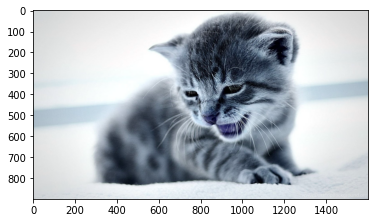

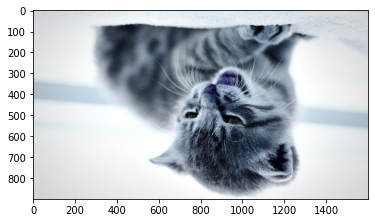

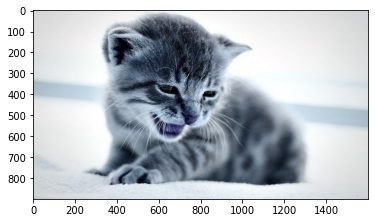

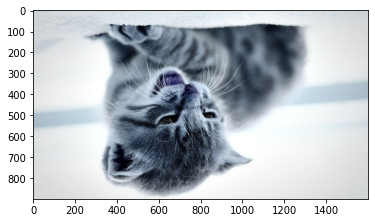

In [ ]:
#Implement Practice 3 here

# Flip

def reverse_on_x(img):

   return img[::-1]  

def reverse_on_y(img):

    a = []

    for _ in range(len(img)):

        a.append(img[_][::-1])

    return a

def flip(img, direction):
    
    if direction == 0:

      plt.imshow(reverse_on_x(img))
      plt.show()

    if direction == 1:
      
      plt.imshow(reverse_on_y(img))
      plt.show()

    if direction == -1:

      plt.imshow(reverse_on_x(reverse_on_y(img)))
      plt.show()

    print("\n\n")
    return;

!wget https://www.desktopbackground.org/download/1600x900/2010/08/14/64140_hd-cat-wallpapers-kitten-images-cute-cat-photos-free-cat-images_1697x1203_h.jpg -O cat.jpg

img = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show();print("\n\n")


flip(img, 0)

flip(img, 1)

flip(img, -1)


# HomeWork

For homework, you need to find connected components in a single image. (See cv2.connectedcomponent function or similar functions)

The expected result is an image with bounding rectangles on each connected component

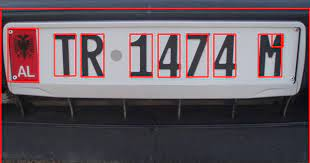

You can use the PUCPR logo!

--2021-08-03 18:03:39--  https://cdn.shopify.com/s/files/1/1683/2303/products/FL1989CarFBQ12V_1024x1024.JPG?v=1485659569
Resolving cdn.shopify.com (cdn.shopify.com)... 151.101.1.12, 151.101.129.12, 151.101.193.12, ...
Connecting to cdn.shopify.com (cdn.shopify.com)|151.101.1.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107272 (105K) [image/jpeg]
Saving to: ‘plate.jpg’

plate.jpg           100%[===================>] 104.76K  --.-KB/s    in 0.01s   

2021-08-03 18:03:39 (7.97 MB/s) - ‘plate.jpg’ saved [107272/107272]



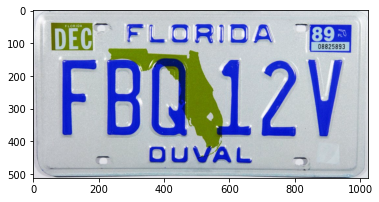

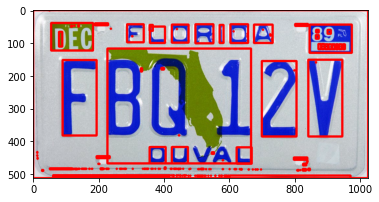

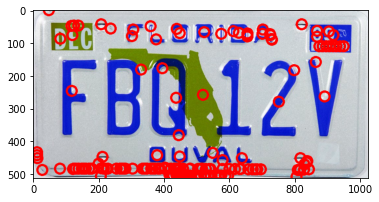

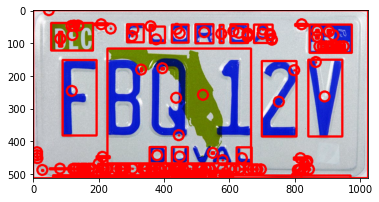

In [97]:


!wget https://cdn.shopify.com/s/files/1/1683/2303/products/FL1989CarFBQ12V_1024x1024.JPG?v=1485659569 -O plate.jpg


img = cv2.imread('plate.jpg', cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show();print("\n\n")

image = img
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )[1]

#thresh = cv2.bitwise_not(thresh)

output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

output_sq, output_cr, output_mx = image.copy(), image.copy(), image.copy()
for i in range(0, numLabels):
    
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    cv2.rectangle(output_sq, (x, y), (x + w, y + h), (255, 0, 0), 5)
    cv2.circle(output_cr, (int(cX), int(cY)), 15, (255, 0, 0), 5)

    cv2.rectangle(output_mx, (x, y), (x + w, y + h), (255, 0, 0), 5)
    cv2.circle(output_mx, (int(cX), int(cY)), 15, (255, 0, 0), 5)

plt.imshow(output_sq);plt.show();print("\n\n")
plt.imshow(output_cr);plt.show();print("\n\n")
plt.imshow(output_mx);plt.show();print("\n\n")



In [ ]:
# https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/
# https://medium.com/swlh/image-processing-with-python-connected-components-and-region-labeling-3eef1864b951
# https://stackoverflow.com/questions/43547540/cv2-connectedcomponents-not-detecting-components
# https://www.pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/